In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [9]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print({recent_date})

{'2017-08-23'}


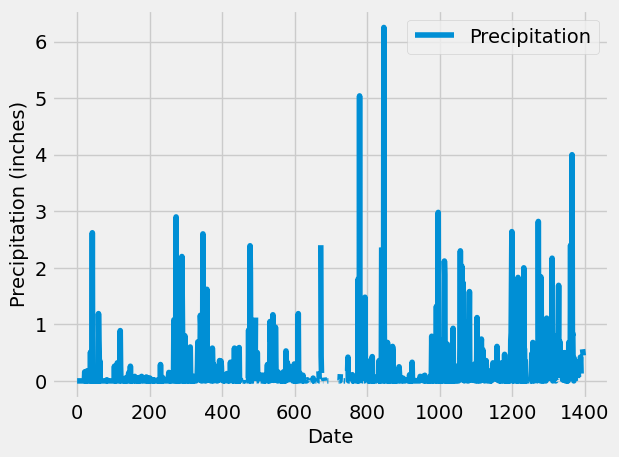

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prec = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016.08.23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_df = pd.DataFrame(prec)
prec_df=prec_df.rename(columns={'prcp':'Precipitation', 'date':'Date'})

# Sort the dataframe by date
precipt_df = prec_df.sort_values(['Date'], ascending=True)
precipt_df = prec_df.set_index('Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).count()
print({station_count})

{9}


In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station)

Text(0.5, 1.0, 'Temperatures')

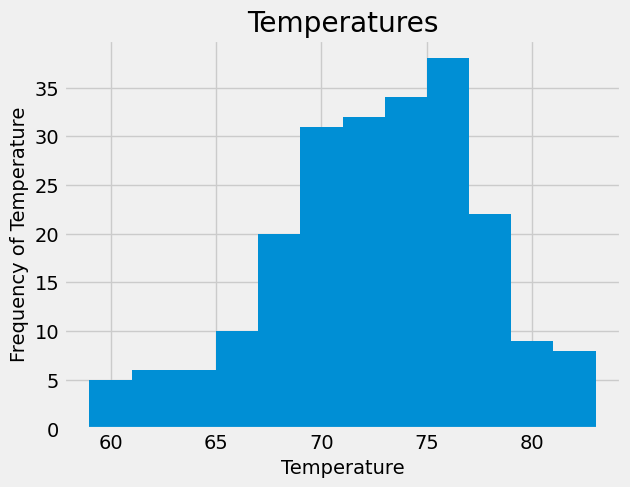

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_mon_temp = session.query(Measurement.tobs).filter(Measurement.station == active_stations[0][0]).filter(Measurement.date >= "2016.08.23").all()
temps = []
for temp in twelve_mon_temp:
    temps.append(temp[0])
plt.hist(temps, bins=12)
plt.ylabel('Frequency of Temperature')
plt.xlabel('Temperature')
plt.title('Temperatures')


# Close Session

In [27]:
# Close Session
session.close()